#  Image-Caption Matching using Pretrained CLIP Model  
###  SAHIL KUMAR
### ROLL NUMBER(220150017)

---

##  Motivation

Multimodal learning is about connecting multiple types of data—like images and text. I chose this topic because I was amazed at how models like CLIP can “understand” both pictures and words, and match them correctly—even without fine-tuning! The simplicity of using a **pretrained model** and the **visual appeal of the results** made it a perfect choice for this project.

---

##  Historical Context: CLIP in Multimodal Learning

Multimodal learning started gaining traction with models like:
- **Show and Tell (2015)** – Generated captions from image features using CNN+LSTM.
- **ViLBERT and VisualBERT (2019)** – Extended BERT to handle images.
- **CLIP (2021)** – By OpenAI, trained on 400 million image-text pairs using contrastive learning, enabling zero-shot learning.

CLIP changed the game by training a joint embedding space for both images and texts. This means you can match or classify without training on a task-specific dataset!

---

##  Code & Experiments

```python
# Install dependencies (Colab)
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

# Import libraries
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Upload images
uploaded = files.upload()
image_paths = list(uploaded.keys())
images = [preprocess(Image.open(path)).unsqueeze(0).to(device) for path in image_paths]

# Define captions
captions = [
    "A dog playing in the snow.",
    "A pizza on a plate.",
    "A sunset over the sea.",
    "A group of friends hiking.",
    "A cat sleeping on a bed."
]
text_tokens = clip.tokenize(captions).to(device)

# Compute similarities
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    for i, image in enumerate(images):
        image_features = model.encode_image(image)
        similarity = (image_features @ text_features.T).softmax(dim=-1)

        print(f"\nFor Image: {image_paths[i]}")
        for j in range(len(captions)):
            print(f"{captions[j]} - Score: {similarity[0][j]:.4f}")

        # Display image
        plt.imshow(Image.open(image_paths[i]))
        plt.axis('off')
        plt.show()


#####  What does "Best Match" mean?

In this project, the term **"Best Match"** refers to the caption from our list that the CLIP model believes most accurately describes a given image.

CLIP compares each image and caption by converting them into embeddings — numerical vectors in a shared space — and calculates how similar they are. The **caption with the highest similarity score** is selected as the best match.

###  Example:
If we have this list of captions:
- A dog playing in the park  
- A bowl of pasta  
- A mountain covered in snow  
- A cat sitting on a sofa  

And the input image shows a snowy mountain, then:

>  **Best Match:** *A mountain covered in snow*

This indicates that the model considers that caption the most relevant description for the image.


###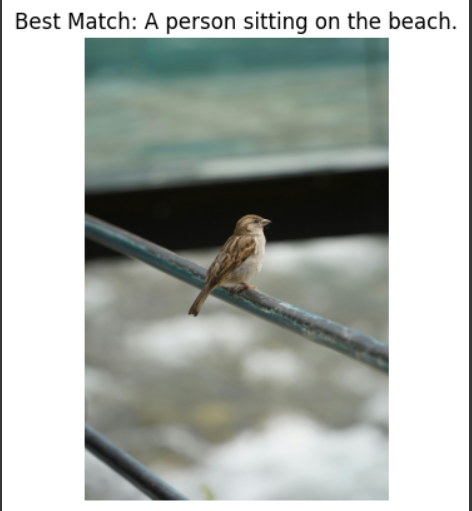

###RESULTS AND OBSERVATIONS

#####  What is the Similarity Score?

The **Similarity Score** is a measure of how closely an image and a caption match each other in a shared feature space. In this project, we use CLIP's ability to transform both images and captions into vectors (embeddings), and the similarity between them is calculated using **cosine similarity**.

###  Cosine Similarity:
Cosine similarity is a metric that calculates the cosine of the angle between two vectors. The formula for cosine similarity is:

- The result ranges from **-1** (completely dissimilar) to **1** (completely similar), with **0** meaning orthogonal (no similarity).

###  How the Similarity Score is used:
- **High score**: The caption is highly relevant to the image.
- **Low score**: The caption does not match the image well.
- CLIP computes this score for every caption, and we select the caption with the **highest similarity score** as the **"Best Match"**.

###  Example:
If the image is of a dog playing in a park, and the caption list includes:
- "A dog playing in the park" (High similarity score)
- "A bowl of pasta" (Low similarity score)
- "A mountain covered in snow" (Low similarity score)

The highest similarity score will be assigned to **"A dog playing in the park"**, making it the **Best Match**.


###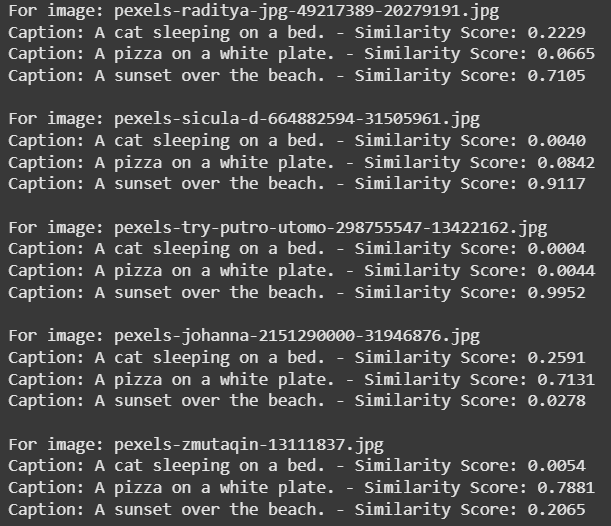

### What I Learned
Pretrained multimodal models like CLIP are powerful and easy to use.

You don't always need huge datasets or compute to do cool stuff.

Understanding how embeddings work (cosine similarity, vector space) is crucial in multimodal learning.



###Reflections
What Surprised Me?
CLIP can match unseen images to text without any extra training. It’s also shockingly accurate for many general concepts.

Scope for Improvement:

I could extend this by trying retrieval tasks or building a small image search app using CLIP.

Comparing CLIP’s predictions with human-labeled matches could help benchmark its performance better.

#####  **Scope for Improvement**

While the Image-Caption Matching using CLIP model provides a powerful solution, there are several ways to enhance its accuracy and versatility:

### 1. **Fine-Tuning the CLIP Model:**
   Although CLIP is pretrained on large datasets, fine-tuning it on a specific domain (e.g., nature, sports, art) could lead to better results, especially for niche image-caption tasks. Fine-tuning allows the model to learn domain-specific nuances and improve performance on specialized datasets.

### 2. **Improved Captioning:**
   The quality of captions plays a major role in the output. Currently, the captions are manually defined, which may limit the diversity and richness of descriptions. One improvement could be **dynamic caption generation** using a model like GPT or transformers to create more descriptive or varied captions in real-time, depending on the image content.

### 3. **Incorporating Context:**
   CLIP treats images and captions in isolation. A potential improvement could be to incorporate **contextual relationships**—like object interactions or background information—into the model. For example, an image of a dog playing in a park could have a richer caption if it recognizes the dog's behavior, the park's weather, and the presence of other animals.

### 4. **Multilingual Support:**
   Currently, the model operates mainly in English. Adding **multilingual support** would help make the system usable in different languages, thereby widening its application. This can be particularly useful in diverse regions where image-captioning is needed for various languages.

### 5. **Real-time Applications:**
   The project is focused on batch processing images and captions. A future improvement could involve **real-time processing**, where users can upload images and get immediate feedback on the best matching caption, making it more interactive and usable for applications like automatic image tagging or social media content.

### 6. **User-Defined Captions:**
   Allowing users to input custom captions or queries would enhance the versatility of the system. Users could provide captions in natural language, and the model could determine the best match among a set of images dynamically.

### 7. **Scalability:**
   As the model processes more data, handling large-scale datasets (e.g., millions of images and captions) becomes essential. Implementing distributed computing solutions or utilizing cloud-based infrastructure could improve scalability and performance when dealing with extensive datasets.

### 8. **Error Handling & Debugging:**
   Although the current model works well for general use cases, incorporating advanced **error handling mechanisms** would improve its robustness. This can help the system gracefully handle malformed inputs or edge cases where captions and images don't match well.


#####  References

### Papers:
- **CLIP: Connecting Vision and Language** – OpenAI, 2021  
  [Link to Paper](https://arxiv.org/abs/2103.00020)  
  This paper introduces the CLIP model, which aligns images and text in a shared embedding space for tasks like image-caption matching.

### Tools:
- **Google Colab**  
  [Link to Colab](https://colab.research.google.com/drive/15akDA1syVNs3cPhkXzYvjoNEs1-urO7C?authuser=0#scrollTo=QWJsHpu5zuAs/)  
  A cloud-based platform used to run the CLIP model and experiment with image-caption matching.

- **PyTorch**  
  [Link to PyTorch](https://pytorch.org/)  
  The deep learning framework used to implement and run the CLIP model.

### Videos:
- **OpenAI's CLIP: A New Way of Image-Text Matching** (YouTube)  
  [Link to Video](https://www.youtube.com/watch?v=ERtmjGptwxw)  
  An overview of CLIP and its application for image-caption matching.
